### Student Information
Name: 王昊平

Student ID: 109020005

GitHub ID:  howardwang1005 

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

repository link
https://github.com/howardwang1005?tab=repositories

### **First Part** 
1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__

Chapt 1

In [38]:
### Begin Assignment Here
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Chapt 2

In [39]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [40]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [41]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [42]:
# Answer here
for t in twenty_train.data[:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

Chapt 3

In [43]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [44]:
len(X)

2257

In [45]:
for t in X["text"][:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. 
From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh  Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28    	Hi,  	I have a problem, I hope some of the 'gurus' can help me solve.  	Background of the problem: 	I have a rectangular mesh in the uv

In [46]:
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


In [47]:
# using loc (by label)
X.loc[ :10,'text']

0     From: sd345@city.ac.uk (Michael Collier) Subje...
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4     From: stanly@grok11.columbiasc.ncr.com (stanly...
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...
7     From: aldridge@netcom.com (Jacquelin Aldridge)...
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
Name: text, dtype: object

In [48]:
# using iloc (by position)
X.iloc[:10, 0]

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [49]:
## Combining positional and label-based indexing
X.loc[X.index[[0, 2]], 'category']

0    1
2    3
Name: category, dtype: int64

### ** >>> Exercise 3 (5 min): **  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [50]:
X[X["category_name"]=="sci.med"].iloc[::10][0:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


In [51]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


Chapt 4

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [52]:
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

In [53]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [54]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

,text,category
0,dummy_record,1


In [55]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [56]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [57]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [58]:
#del null data
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [59]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [60]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

# Answer here
Since Index 2 ,3 and 5 will be considered as "string" type. And Index 1 are NaN in Numpy.Index 2 is no entry value ,so it will be thought of as NULL by system. Index 4 is the python keyword None which python system has defined. 

In [61]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2252    False
2253    False
2254    False
2255    False
2256    False
Length: 2257, dtype: bool

In [62]:
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


In [63]:
X.duplicated().sum()

0

In [64]:
#concatenate duplicate data iinto X
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)
sum(X.duplicated())

1

In [65]:
len(X)

2259

In [66]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [67]:
len(X)

2257

Chapt 5

In [68]:
print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)

(2257, 3)


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

# Answer here
The sample I get will not in the order,so when I use iloc ,we may not get the first 0 to 9 smallest index sample.Besides, I also find an error when I use iloc to see the 'text' of the first ten data in sample. This may result from the scattering sampling data I mentioned above since we can get the correct index 0 to 9 data in random sample. 

In [69]:
X_sample.iloc[:10]

,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
535,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
809,From: JEK@cu.nih.gov Subject: Thinking about h...,3,soc.religion.christian
2002,From: asket@acad2.alaska.edu Subject: When is ...,3,soc.religion.christian
2166,Subject: XLib and 24 Bit Displays [Info Needed...,1,comp.graphics
1272,From: wcsbeau@alfred.carleton.ca (OPIRG) Subje...,2,sci.med


In [70]:
X_sample.loc[:10,"text"]

KeyError: 10

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

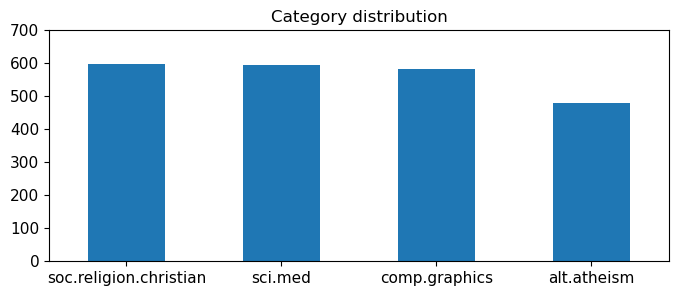

In [72]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

277
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

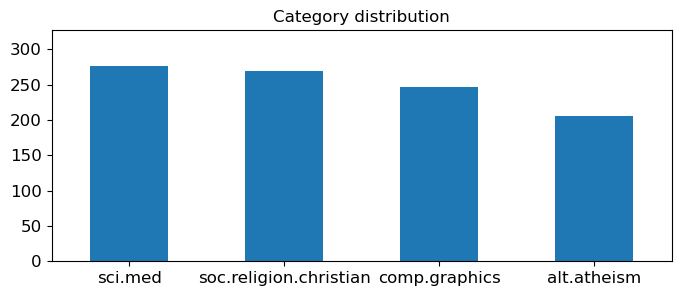

In [73]:
# Answer here

# plot barchart for X_sample
print(max(X_sample.category_name.value_counts()))
upper_bound = max(X_sample.category_name.value_counts() + 50) #277 + 50
print(X_sample.category_name.value_counts())

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

<AxesSubplot:title={'center':'Category distribution'}>

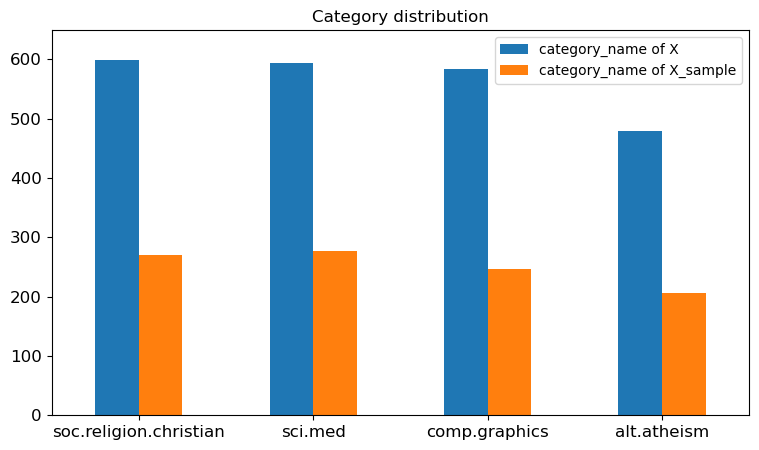

In [74]:
# Answer here
numofX = X.category_name.value_counts().rename_axis('values').to_frame('category_name of X')
numofXSample = X_sample.category_name.value_counts().rename_axis('values').to_frame('category_name of X_sample')

cnCountCat = pd.concat([numofX, numofXSample], axis=1).reset_index(drop=False)
upper_bound = max(X.category_name.value_counts() + 50) #from the bigger one

cnCountCat.plot(kind = 'bar',
                x = 'values',
                y = ['category_name of X', 'category_name of X_sample'],
                title = 'Category distribution',
                xlabel = '',
                ylim = [0, upper_bound], 
                rot = 0, fontsize = 12, figsize = (9,5))

In [75]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/howard891005/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [76]:
'''
LookupError: 
**********************************************************************
  Resource punkt not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt')
'''
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [77]:
X

,text,category,category_name,unigrams
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co..."
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B...."
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ..."
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ..."
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com..."
...,...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med,"[From, :, roos, @, Operoni.Helsinki.FI, (, Chr..."
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med,"[From, :, mhollowa, @, ic.sunysb.edu, (, Micha..."
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med,"[From, :, sasghm, @, theseus.unx.sas.com, (, G..."
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med,"[From, :, Dan, Wallach, <, dwallach, @, cs.ber..."


In [78]:
list(X[0:1]["unigrams"])

[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0])

(2257, 35788)
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [80]:
## print出另一個對應到的數字
print(X_counts[4, 0:100]) 

  (0, 0)	1
  (0, 37)	1


In [81]:
##將此單字對應的vocab印出 
count_vect.get_feature_names_out()[37]

'01'

/Users/howard891005/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


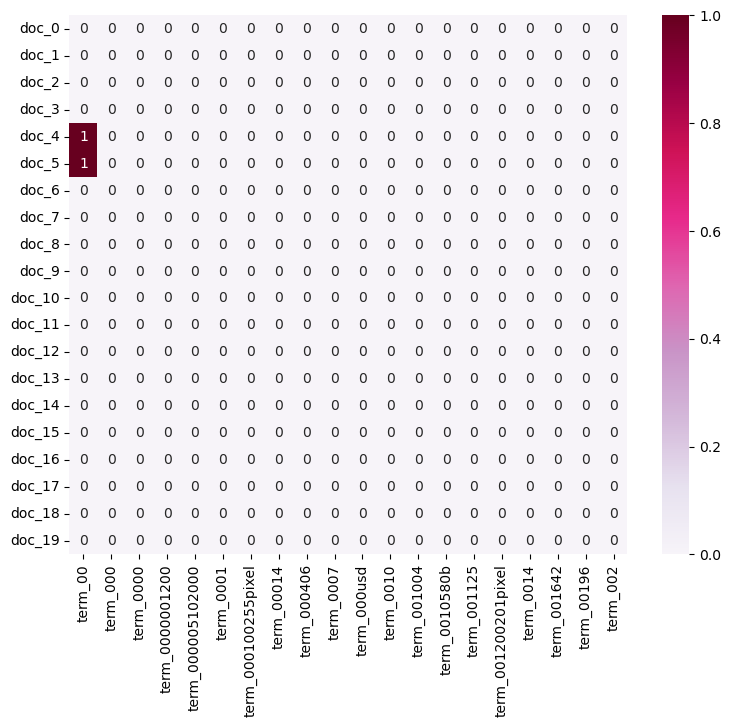

In [82]:
import seaborn as sns

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 

(30, 50)
['about' 'am' 'an' 'and' 'any' 'are' 'as' 'at' 'be' 'but' 'can' 'do'
 'does' 'edu' 'for' 'from' 'god' 'good' 'have' 'he' 'his' 'if' 'in' 'is'
 'it' 'lines' 'me' 'my' 'not' 'of' 'on' 'or' 'organization' 're' 'so'
 'subject' 'that' 'the' 'there' 'they' 'this' 'to' 'was' 'what' 'which'
 'who' 'will' 'with' 'you' 'your']


,word_about,word_am,word_an,word_and,word_any,word_are,word_as,word_at,word_be,word_but,...,word_this,word_to,word_was,word_what,word_which,word_who,word_will,word_with,word_you,word_your
doc_index_0,0,0,0,0,1,0,0,0,0,0,...,1,4,0,0,0,0,0,0,0,0
doc_index_1,0,0,0,0,3,0,1,0,4,0,...,3,4,0,0,1,0,0,0,0,0
doc_index_2,1,0,2,9,1,6,0,7,8,1,...,14,26,3,2,0,1,4,7,13,7
doc_index_3,1,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
doc_index_4,0,1,0,3,0,2,2,1,0,0,...,2,8,0,0,2,1,0,0,1,1
doc_index_5,0,0,0,7,0,3,3,1,12,0,...,2,14,0,1,0,1,0,0,0,0
doc_index_6,1,0,0,7,0,5,4,1,3,1,...,0,8,0,0,0,0,0,2,0,0
doc_index_7,1,1,3,9,4,3,4,2,5,4,...,2,11,3,0,2,1,5,5,0,0
doc_index_8,0,0,0,5,0,3,0,0,0,1,...,1,6,0,1,0,0,0,0,1,0
doc_index_9,6,7,1,23,0,0,3,2,1,3,...,7,21,16,4,2,1,0,9,5,0


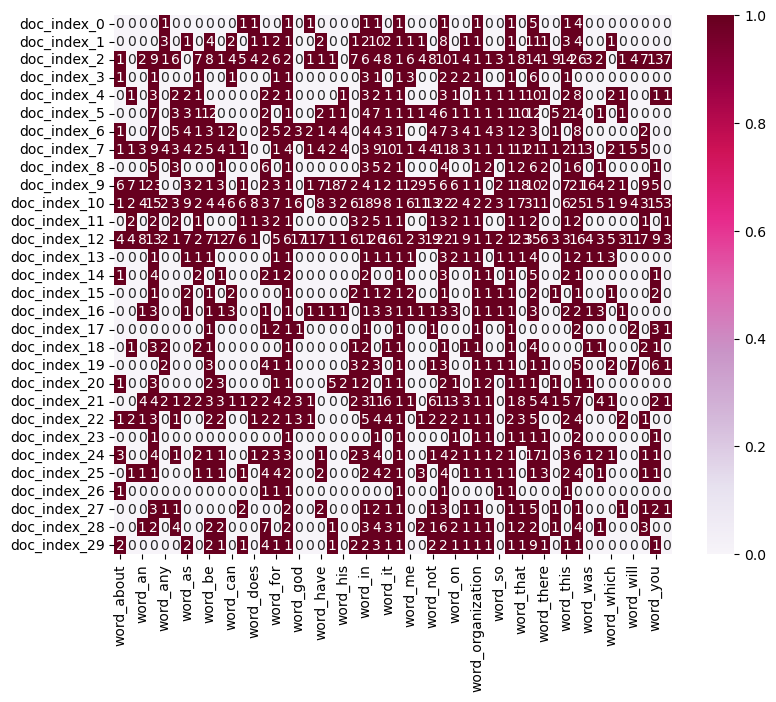

In [83]:
import seaborn as sns

## top 50 words
count_vect_com = CountVectorizer(max_features=50)
count_matrix_com = count_vect_com.fit_transform(X.text[0:30])

print(count_matrix_com.get_shape())
print(count_vect_com.get_feature_names_out()[0:50])

plotx = ["word_"+str(i) for i in count_vect_com.get_feature_names_out()[0:50]]
ploty = ['doc_index_'+str(i) for i in range(30)]
plotz = count_matrix_com[0:30,0:50].toarray()

df_todraw = pd.DataFrame(plotz, columns = plotx, index = ploty)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [84]:
from sklearn.decomposition import PCA

In [85]:
print(X_counts.shape)
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2257, 35788)
(2257, 2)


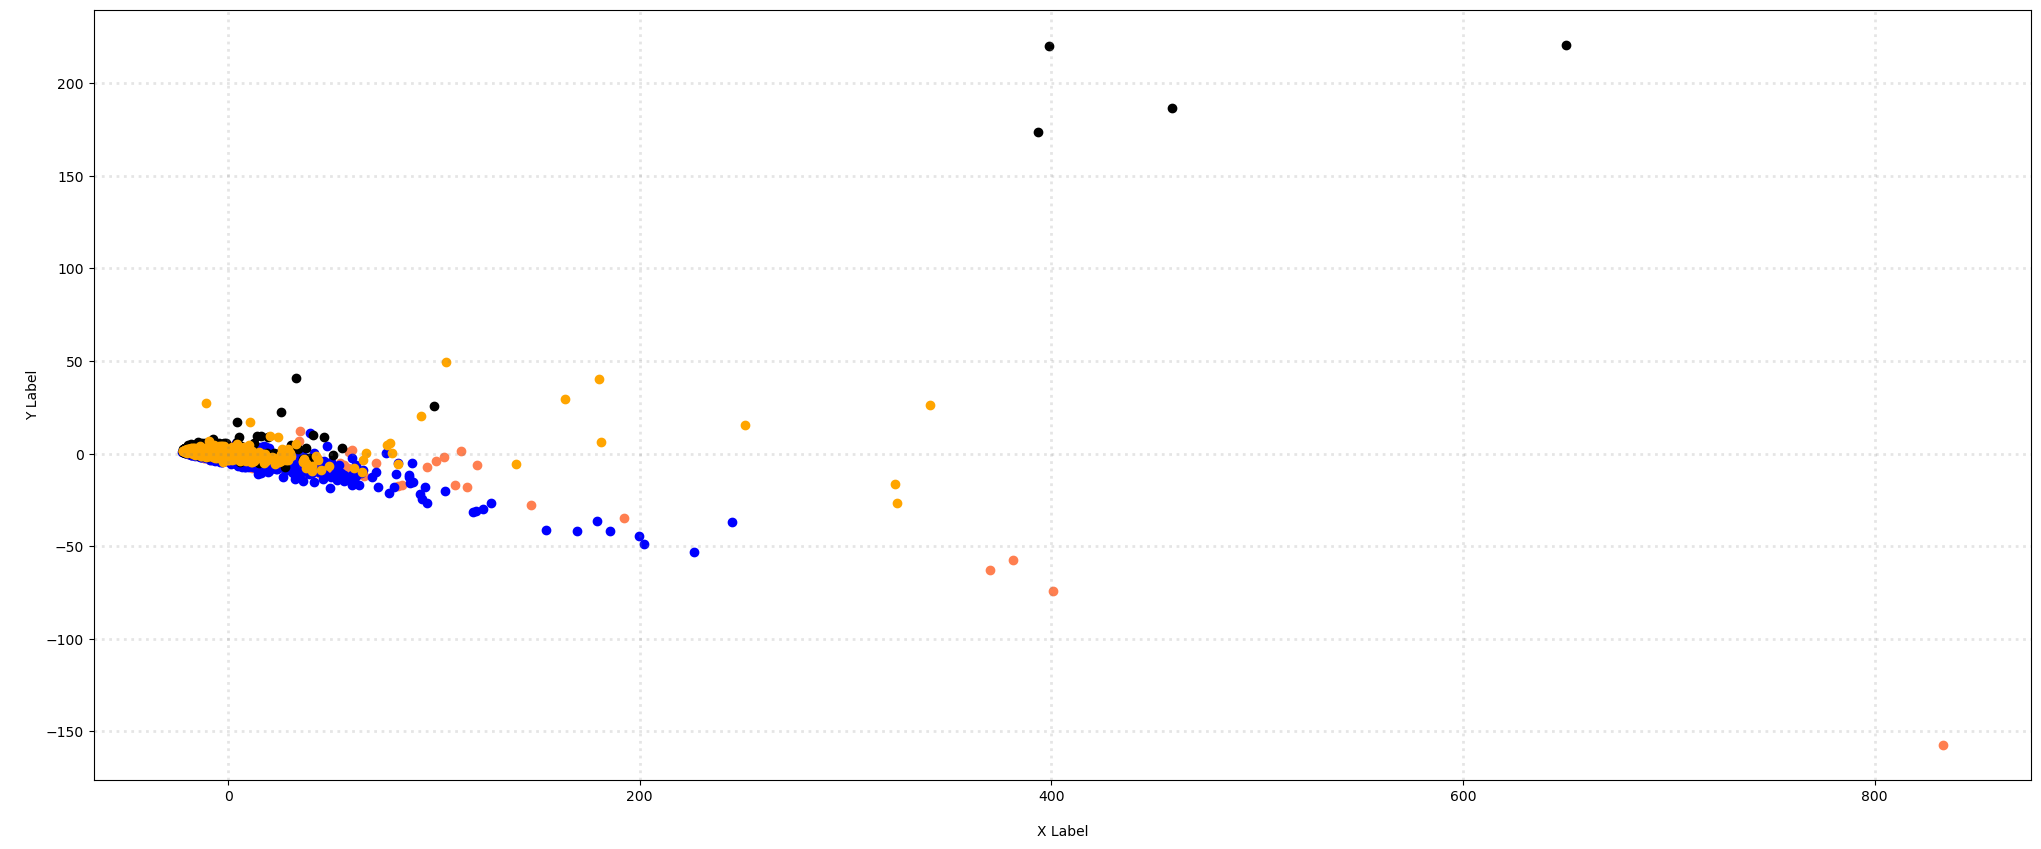

In [86]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

## >>>Exercise 12 (take home):

(2257, 35788)
(2257, 3)


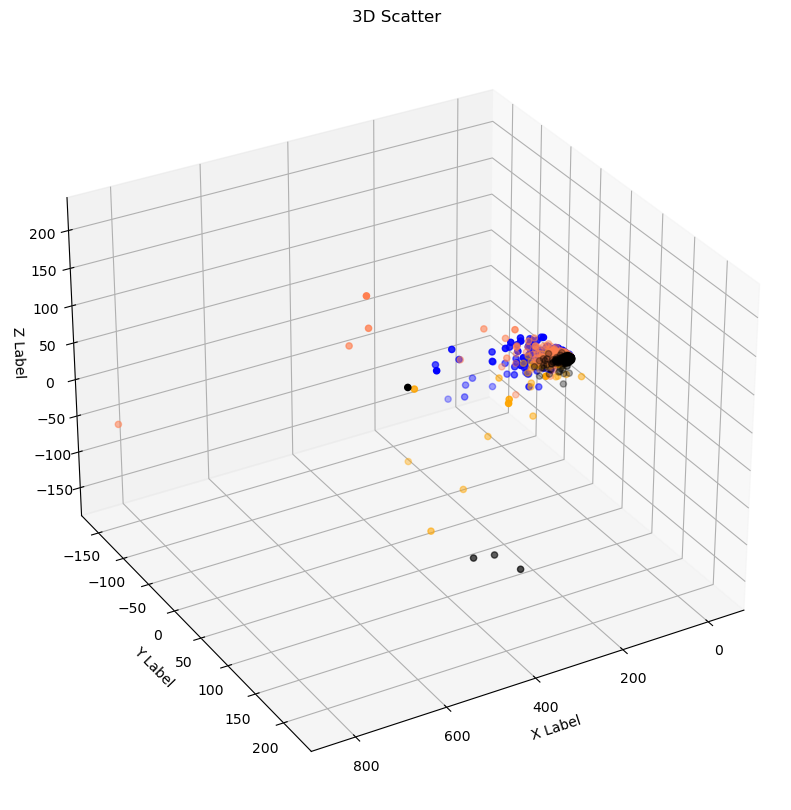

In [87]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

print(X_counts.shape)
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    
    ax.view_init(30,60)
    ax.scatter(xs, ys, zs, c=c)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title(f'3D Scatter')

plt.show()

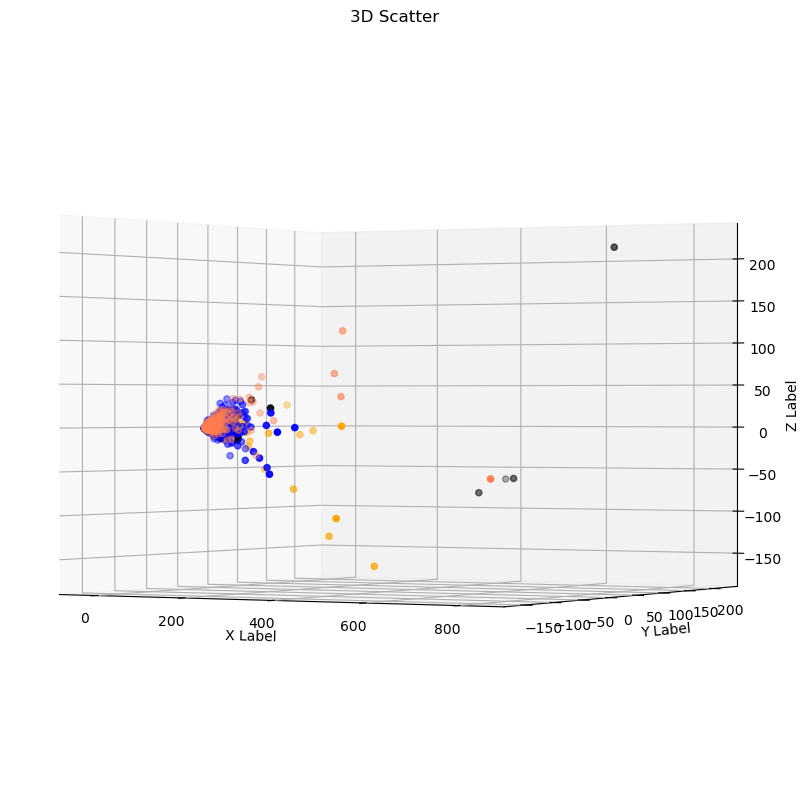

In [88]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    
    ax.view_init(0)
    ax.scatter(xs, ys, zs, c=c)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title(f'3D Scatter')

plt.show()

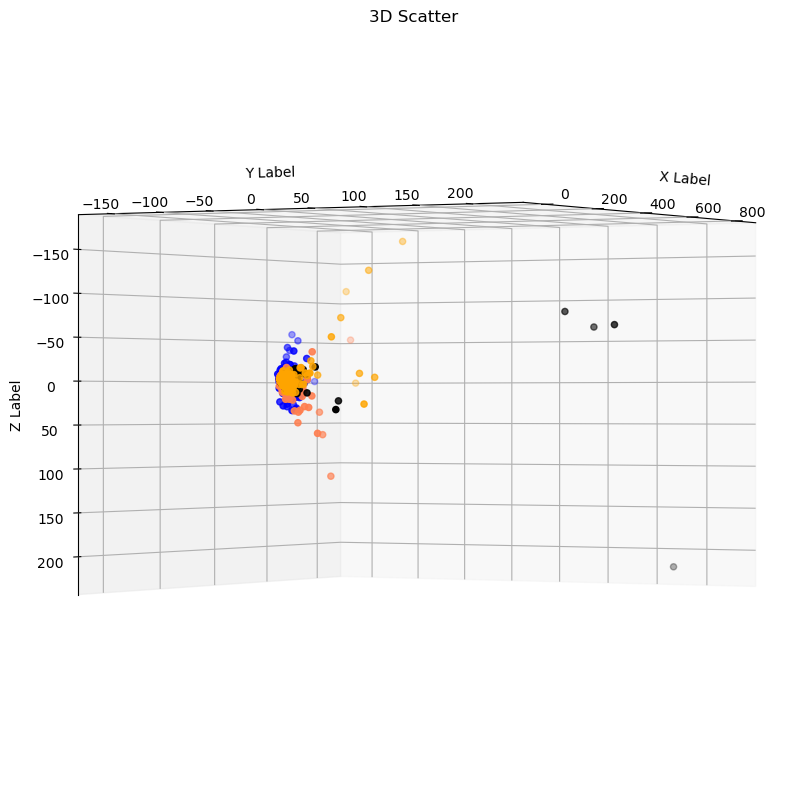

In [89]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    
    ax.view_init(-360,150)
    ax.scatter(xs, ys, zs, c=c)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title(f'3D Scatter')

plt.show()

In [91]:
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

35788


# >>> Exercise 13

In [92]:
!pip install chart-studio

In [93]:
import pandas as pd
import plotly.graph_objs as go
# 建立ㄌX&Y軸
x = count_vect.get_feature_names_out()[:300]
y = term_frequencies[:300]
trace = go.Bar(x=x,y=y,name="Term Frequency")
# 建立標籤
layout = go.Layout(title="Frequency Analyze",xaxis={"title":"term"},
    yaxis={"title":"times"},barmode="group")
fig = go.Figure(data = [trace],layout=layout)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

## >>> Exercise 14


In [94]:
x = np.asarray(count_vect.get_feature_names_out()[:300]).reshape((300,1))
y = term_frequencies[:300].reshape((300,1))
sum =  np.hstack((x, y))
feature_names=[]
frequencies=[]
for j in range(0,sum.shape[0]):
    if sum[j,1]>1:
        feature_names.append(sum[j,0])
        frequencies.append(sum[j,1])

x = feature_names
y = frequencies
trace = go.Bar(x=x,y=y,name="times")
layout = go.Layout(title="term frequency larger than 1",xaxis={"title":"term"},
    yaxis={"title":"times"},barmode="group")

fig = go.Figure(data = [trace],layout=layout)
fig.show()

# >>> Exercise 15

In [95]:
x = np.asarray(count_vect.get_feature_names_out()[:300]).reshape((300,1))
y = term_frequencies[:300].reshape((300,1))
sum =  np.hstack((x, y))

##sort
sum_sorted = np.array(sorted(sum, key=lambda row: row[1], reverse=True))
feature_names=[]
frequencies=[]
for j in range(0,sum_sorted.shape[0]):
    if sum[j,1]>1:
        feature_names.append(sum_sorted[j,0])
        frequencies.append(sum_sorted[j,1])

x = feature_names
y = frequencies
trace = go.Bar(x=x,y=y,name="times")
layout = go.Layout(title="term frequency larger than 1",xaxis={"title":"term"},
    yaxis={"title":"times"},barmode="group")

fig = go.Figure(data = [trace],layout=layout)
fig.show()

In [98]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

# >>> Exercise 16

In [99]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:10]

,text,category,category_name,unigrams,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med,"[From, :, libman, @, hsc.usc.edu, (, Marlena, ...","[0, 0, 1, 0]"


## **Second Part**
2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

In [100]:
!wget https://archive.ics.uci.edu/static/public/331/sentiment+labelled+sentences.zip
!mkdir dataset
!unzip sentiment+labelled+sentences.zip -d -o ./dataset

--2023-10-27 22:47:11--  https://archive.ics.uci.edu/static/public/331/sentiment+labelled+sentences.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: 'sentiment+labelled+sentences.zip.1'

sentiment+labelled+     [           <=>      ]  82.21K  20.6KB/s    in 4.0s    

2023-10-27 22:47:16 (20.6 KB/s) - 'sentiment+labelled+sentences.zip.1' saved [84188]

mkdir: dataset: File exists
Archive:  sentiment+labelled+sentences.zip
caution: filename not matched:  ./dataset


#  Data Preparation and 3.1 Converting Dictionary into Pandas Dataframe

In [101]:
data_amazon=pd.read_csv(r"/Users/howard891005/Desktop/DMLab1/DM2023-Lab1-Master/Homework/sentiment labelled sentences/amazon_cells_labelled.txt", sep='\t',header=None)
data_imdb=pd.read_csv(r"/Users/howard891005/Desktop/DMLab1/DM2023-Lab1-Master/Homework/sentiment labelled sentences/imdb_labelled.txt", sep='\t',header=None,quoting=3)
data_yelp=pd.read_csv(r"/Users/howard891005/Desktop/DMLab1/DM2023-Lab1-Master/Homework/sentiment labelled sentences/yelp_labelled.txt", sep='\t',header=None)
data_columns=["text","label"]
data_amazon.columns=data_columns
data_imdb.columns=data_columns
data_yelp.columns=data_columns
display(data_amazon)
display(data_imdb)
display(data_yelp)

,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


,text,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
995,I just got bored watching Jessice Lange take h...,0
996,"Unfortunately, any virtue in this film's produ...",0
997,"In a word, it is embarrassing.",0
998,Exceptionally bad!,0


,text,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


## Combine them and adding column

In [102]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh
all_data=pd.concat([data_amazon,data_imdb,data_yelp],axis=0,ignore_index=True)
display(all_data)
# adding category
all_data['category'] = ''
for i in range(len(all_data)):
    if all_data["label"][i]==0:
        all_data['category'][i] = "negative"
    else:
        all_data['category'][i] = "positive"
all_data['prov'] = ''
for provs in range(3):
    for i in range(1000):
        if provs == 0:
            all_data["prov"][i] = "amazon"
        elif provs == 1:
            all_data["prov"][i+1000] = "imdb"
        elif provs == 2:
            all_data["prov"][i+2000] ="yelp"
print(all_data['prov'])

,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


/var/folders/f1/k7_yxl9d2sqd42ql6crb0xr80000gn/T/ipykernel_66739/3451975431.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/f1/k7_yxl9d2sqd42ql6crb0xr80000gn/T/ipykernel_66739/3451975431.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/f1/k7_yxl9d2sqd42ql6crb0xr80000gn/T/ipykernel_66739/3451975431.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/f1/k7_yxl9d2sqd42ql6crb0xr80000gn/T/ipy

0       amazon
1       amazon
2       amazon
3       amazon
4       amazon
         ...  
2995      yelp
2996      yelp
2997      yelp
2998      yelp
2999      yelp
Name: prov, Length: 3000, dtype: object


In [103]:
all_data

,text,label,category,prov
0,So there is no way for me to plug it in here i...,0,negative,amazon
1,"Good case, Excellent value.",1,positive,amazon
2,Great for the jawbone.,1,positive,amazon
3,Tied to charger for conversations lasting more...,0,negative,amazon
4,The mic is great.,1,positive,amazon
...,...,...,...,...
2995,I think food should have flavor and texture an...,0,negative,yelp
2996,Appetite instantly gone.,0,negative,yelp
2997,Overall I was not impressed and would not go b...,0,negative,yelp
2998,"The whole experience was underwhelming, and I ...",0,negative,yelp


# Exercise 1

In [104]:
for t in all_data.text[:3]: 
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


# Exercise 2

In [105]:
## Combining positional and label-based indexing
all_data.loc[all_data.index[[0, 2]], 'category']

0    negative
2    positive
Name: category, dtype: object

# Exercise 3

In [106]:
## 找label==1 每次找十筆但只顯示前五筆資料
all_data[all_data['label']==1].iloc[::10][0:5]

,text,label,category,prov
1,"Good case, Excellent value.",1,positive,amazon
21,I bought this to use with my Kindle Fire and a...,1,positive,amazon
44,Excellent bluetooth headset.,1,positive,amazon
61,I really recommend this faceplates since it lo...,1,positive,amazon
78,"I love this phone , It is very handy and has a...",1,positive,amazon


# Exercise 4

In [107]:
all_data.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

In [108]:
all_data.isnull()

,text,label,category,prov
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2995,False,False,False,False
2996,False,False,False,False
2997,False,False,False,False
2998,False,False,False,False


# Exercise 5

In [109]:
import numpy as np


NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df



,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


# Answer here
Since Index 2 ,3 and 5 will be considered as "string" type. And Index 1 are NaN in Numpy.Index 2 is no entry value ,so it will be thought of as NULL by system. Index 4 is the python keyword None which python system has defined.

# Duplicate Data

In [110]:
all_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [111]:
all_data.duplicated().sum()

17

Deal with duplicating data(delete them)

In [112]:
all_data[all_data.duplicated("text")]
all_data.drop_duplicates(inplace=True,ignore_index=True)
len(all_data)

2983

# Sampling

In [113]:
print(all_data.shape, type(all_data) ,sep="\n")
X_sample = all_data.sample(n=1000,random_state=42) #random state
display(X_sample)

(2983, 4)
<class 'pandas.core.frame.DataFrame'>


,text,label,category,prov
2410,We've tried to like this place but after 10+ t...,0,negative,yelp
1547,The script is a big flawed mess.,0,negative,imdb
881,It was that loud.Glad to say that the Plantron...,1,positive,amazon
331,The reception is excellent!,1,positive,amazon
1837,Now imagine that every single one of those dec...,0,negative,imdb
...,...,...,...,...
916,It looses connection to the phone even when it...,0,negative,amazon
1211,There are the usual Hitchcock logic flaws.,0,negative,imdb
2711,Awesome selection of beer.,1,positive,yelp
2457,"Very good, though!",1,positive,yelp


In [114]:
print(len(X_sample))
display(X_sample[0:4])

1000


,text,label,category,prov
2410,We've tried to like this place but after 10+ t...,0,negative,yelp
1547,The script is a big flawed mess.,0,negative,imdb
881,It was that loud.Glad to say that the Plantron...,1,positive,amazon
331,The reception is excellent!,1,positive,amazon


# Exercise 6

# Answer here
The sample I get will not in the order,so when I use iloc ,we may not get the first 0 to 9 smallest index sample.Besides, I also find an error when I use iloc to see the 'text' of the first ten data in sample. This may result from the scattering sampling data I mentioned above since we can get the correct index 0 to 9 data in random sample.  (can see Part 1 Exercise 6)

In [115]:
#利用random_state 去改變採樣參數也能使sample都不盡相同
data_sample_42 = all_data.sample(n=1000,random_state=42)
display(data_sample_42[0:10])
data_sample_1 = all_data.sample(n=1000,random_state=1)
display(data_sample_1[0:10])

,text,label,category,prov
2410,We've tried to like this place but after 10+ t...,0,negative,yelp
1547,The script is a big flawed mess.,0,negative,imdb
881,It was that loud.Glad to say that the Plantron...,1,positive,amazon
331,The reception is excellent!,1,positive,amazon
1837,Now imagine that every single one of those dec...,0,negative,imdb
1242,The soundtrack sucked.,0,negative,imdb
678,This product is clearly not ready for prime ti...,0,negative,amazon
1216,"He can bore you to pieces, and kill the moment...",0,negative,imdb
1029,This was a flick doomed from its conception.,0,negative,imdb
2024,"Poor service, the waiter made me feel like I w...",0,negative,yelp


,text,label,category,prov
540,"sucked, most of the stuff does not work with m...",0,negative,amazon
2354,Would come back again if I had a sushi craving...,1,positive,yelp
829,I don't like this Nokia either.,0,negative,amazon
2584,It'll be a regular stop on my trips to Phoenix!,1,positive,yelp
784,I own 2 of these cases and would order another.,1,positive,amazon
1149,"Yeah, the movie pretty much sucked.",0,negative,imdb
1776,This is an extraordinary film.,1,positive,imdb
2722,"Probably never coming back, and wouldn't recom...",0,negative,yelp
2475,"It was attached to a gas station, and that is ...",0,negative,yelp
840,Not good enough for the price.,0,negative,amazon


In [117]:
import matplotlib.pyplot as plt
%matplotlib inline

all data

negative    1493
positive    1490
Name: category, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

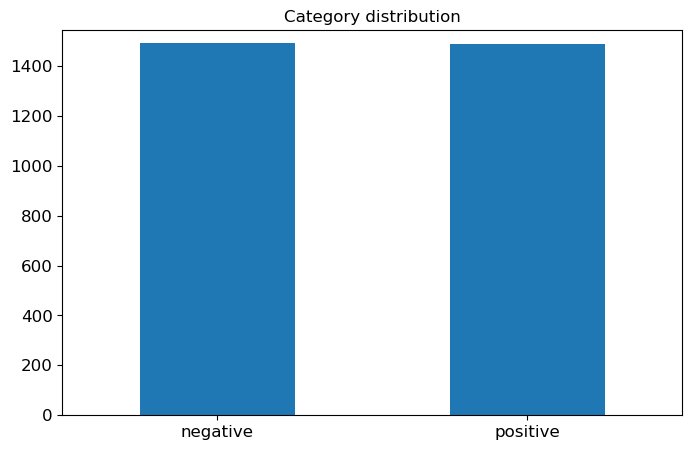

In [118]:
print(all_data.category.value_counts())
upper_bound = max(all_data.category.value_counts() + 50) 
all_data.category.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 12, figsize = (8,5))


sampling data

negative    506
positive    494
Name: category, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

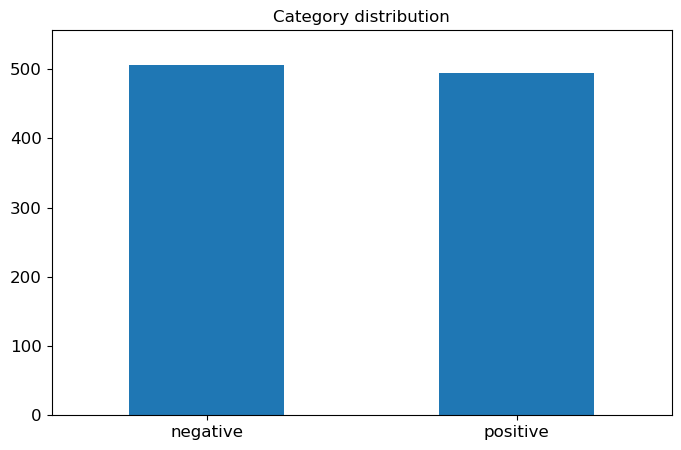

In [119]:
print(X_sample.category.value_counts())
upper_bound = max(X_sample.category.value_counts() + 50) 
X_sample.category.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 12, figsize = (8,5))

# Exercise 7

506
0    506
1    494
Name: label, dtype: int64


<AxesSubplot:title={'center':'Label distribution'}>

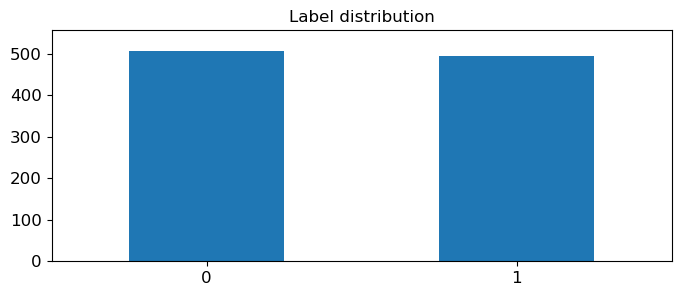

In [120]:
# Answer here

# plot barchart for X_sample
print(max(X_sample.label.value_counts()))
upper_bound = max(X_sample.label.value_counts() + 50) #277 + 50
print(X_sample.label.value_counts())

X_sample.label.value_counts().plot(kind = 'bar',
                                           title = 'Label distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

# Exercise 8

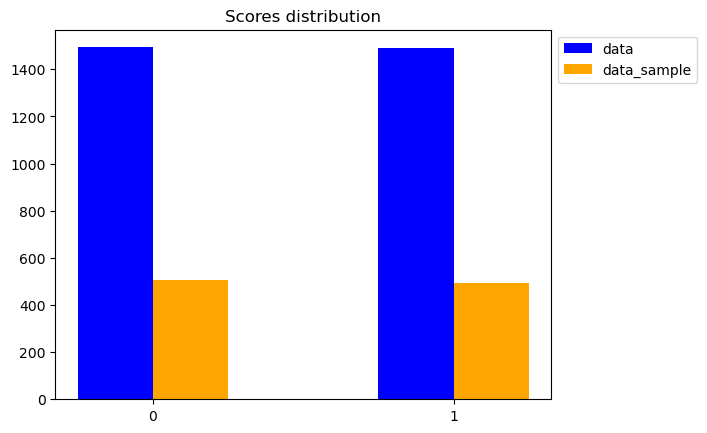

In [121]:
X_counts = all_data.label.value_counts()
X_sample_counts = X_sample.label.value_counts()
categories = [0, 1]
X_categories = np.arange(len(categories))
width = 0.25
plt.bar(X_categories, X_counts, width, color='blue', label='data')
plt.bar(X_categories + width , X_sample_counts, width, color='orange', label='data_sample')
plt.xticks(X_categories + width /2, categories)
plt.title('Scores distribution')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

In [122]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/howard891005/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [123]:
all_data['unigrams'] = all_data['text'].apply(lambda x: dmh.tokenize_text(x))

In [124]:
all_data[0:5]

,text,label,category,prov,unigrams
0,So there is no way for me to plug it in here i...,0,negative,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negative,amazon,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,positive,amazon,"[The, mic, is, great, .]"


In [125]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(all_data.text)
print(type(X_counts))
print(X_counts.shape) 
print(X_counts[0])

<class 'scipy.sparse._csr.csr_matrix'>
(2983, 5155)
  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [126]:
analyze = count_vect.build_analyzer()
analyze(all_data.text[0]) ## tokenization

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

## Exercise 9

In [127]:
analyze(all_data.text[1]) ## tokenization

['good', 'case', 'excellent', 'value']

In [128]:
print(X_counts.shape)

(2983, 5155)


In [129]:
count_vect.get_feature_names_out()[0:20]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17',
       '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973',
       '1979', '1980'], dtype=object)

In [130]:
X_counts[14:20, 150:300].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Exercise 10

In [131]:
print(X_counts[14:20, 150:300]) 

  (0, 147)	1
  (0, 29)	1
  (1, 93)	1


In [132]:
count_vect.get_feature_names_out()[297]

'as'

In [133]:
count_vect.get_feature_names_out()[179]

'all'

In [134]:
all_data.text[14]

'The design is very odd, as the ear "clip" is not very comfortable at all.'

In [135]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[150:300]]
print(plot_x)
plot_y = ["doc_"+ str(i) for i in list(all_data.index)[14:20]]
print(plot_y)

['term_affleck', 'term_affordable', 'term_afraid', 'term_africa', 'term_after', 'term_afternoon', 'term_again', 'term_against', 'term_age', 'term_aged', 'term_ages', 'term_aggravating', 'term_ago', 'term_agree', 'term_agreed', 'term_ahead', 'term_aimless', 'term_air', 'term_aired', 'term_airline', 'term_airport', 'term_akasha', 'term_akin', 'term_ala', 'term_alarm', 'term_albondigas', 'term_alert', 'term_alexander', 'term_alike', 'term_all', 'term_allergy', 'term_allison', 'term_allot', 'term_allow', 'term_allowing', 'term_allows', 'term_almonds', 'term_almost', 'term_alone', 'term_along', 'term_alongside', 'term_alot', 'term_already', 'term_also', 'term_although', 'term_aluminum', 'term_always', 'term_am', 'term_amateurish', 'term_amaze', 'term_amazed', 'term_amazing', 'term_amazingly', 'term_amazon', 'term_ambiance', 'term_ambience', 'term_america', 'term_american', 'term_americans', 'term_among', 'term_amount', 'term_amp', 'term_ample', 'term_amusing', 'term_an', 'term_anatomist', '

In [136]:
plot_z = X_counts[14:20,150:300].toarray()
print(plot_z)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

,term_affleck,term_affordable,term_afraid,term_africa,term_after,term_afternoon,term_again,term_against,term_age,term_aged,...,term_article,term_articulated,term_artiness,term_artist,term_artistic,term_artless,term_arts,term_as,term_asia,term_aside
doc_14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
doc_15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


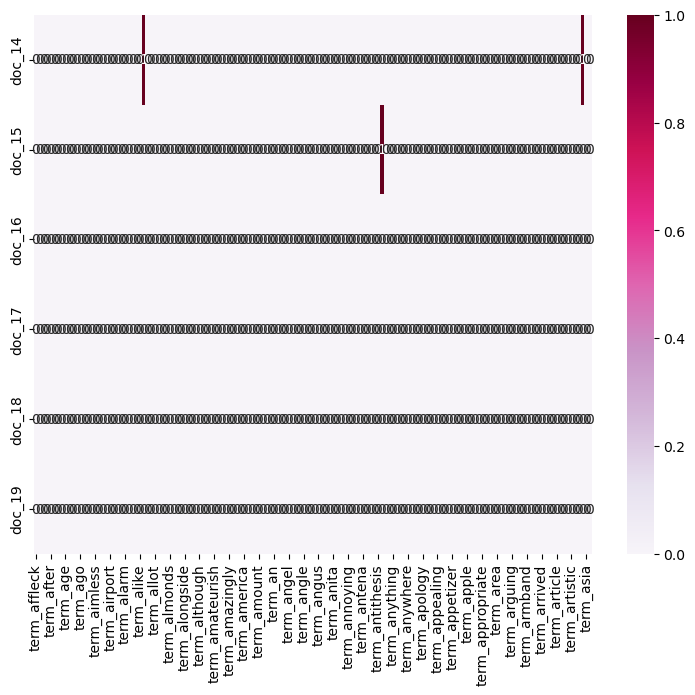

In [137]:
import seaborn as sns
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

# Exercise 11 

(30, 30)
['and' 'battery' 'by' 'for' 'from' 'get' 'good' 'great' 'had' 'have' 'if'
 'in' 'is' 'it' 'me' 'my' 'not' 'of' 'on' 'one' 'phone' 'say' 'so' 'sound'
 'that' 'the' 'this' 'to' 'very' 'you']


,word_and,word_battery,word_by,word_for,word_from,word_get,word_good,word_great,word_had,word_have,...,word_phone,word_say,word_so,word_sound,word_that,word_the,word_this,word_to,word_very,word_you
doc_index_0,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
doc_index_1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_index_2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
doc_index_3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
doc_index_4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
doc_index_5,0,0,0,0,0,2,0,0,0,1,...,0,0,0,0,0,1,0,4,0,0
doc_index_6,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
doc_index_7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,2
doc_index_8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
doc_index_9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


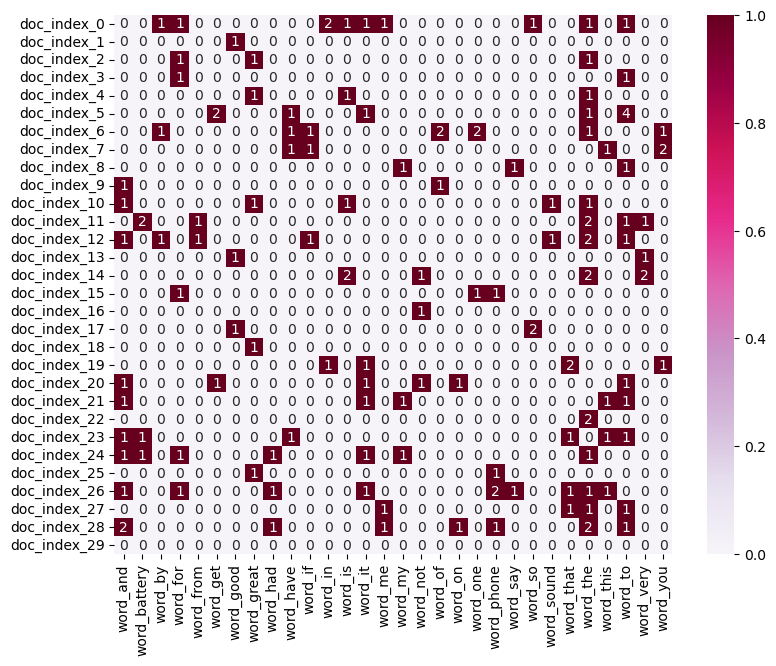

In [138]:
import seaborn as sns

count_vect_com = CountVectorizer(max_features=30)
count_matrix_com = count_vect_com.fit_transform(all_data.text[0:30])

print(count_matrix_com.get_shape())
print(count_vect_com.get_feature_names_out()[0:30])

plotx = ["word_"+str(i) for i in count_vect_com.get_feature_names_out()[0:30]]
ploty = ['doc_index_'+str(i) for i in range(30)]
plotz = count_matrix_com[0:30,0:30].toarray()

df_todraw = pd.DataFrame(plotz, columns = plotx, index = ploty)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [139]:
from sklearn.decomposition import PCA


In [140]:
print(X_counts.shape)
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(X_reduced.shape)

print(categories)
print(X_reduced)

(2983, 5155)
(2983, 2)
[0, 1]
[[ 0.52403897  0.2872506 ]
 [-0.89836918 -0.36059181]
 [ 0.01536215 -0.66712392]
 ...
 [-0.50167683  0.4133451 ]
 [ 0.49819505  0.36754758]
 [ 2.33191551 -0.4756432 ]]


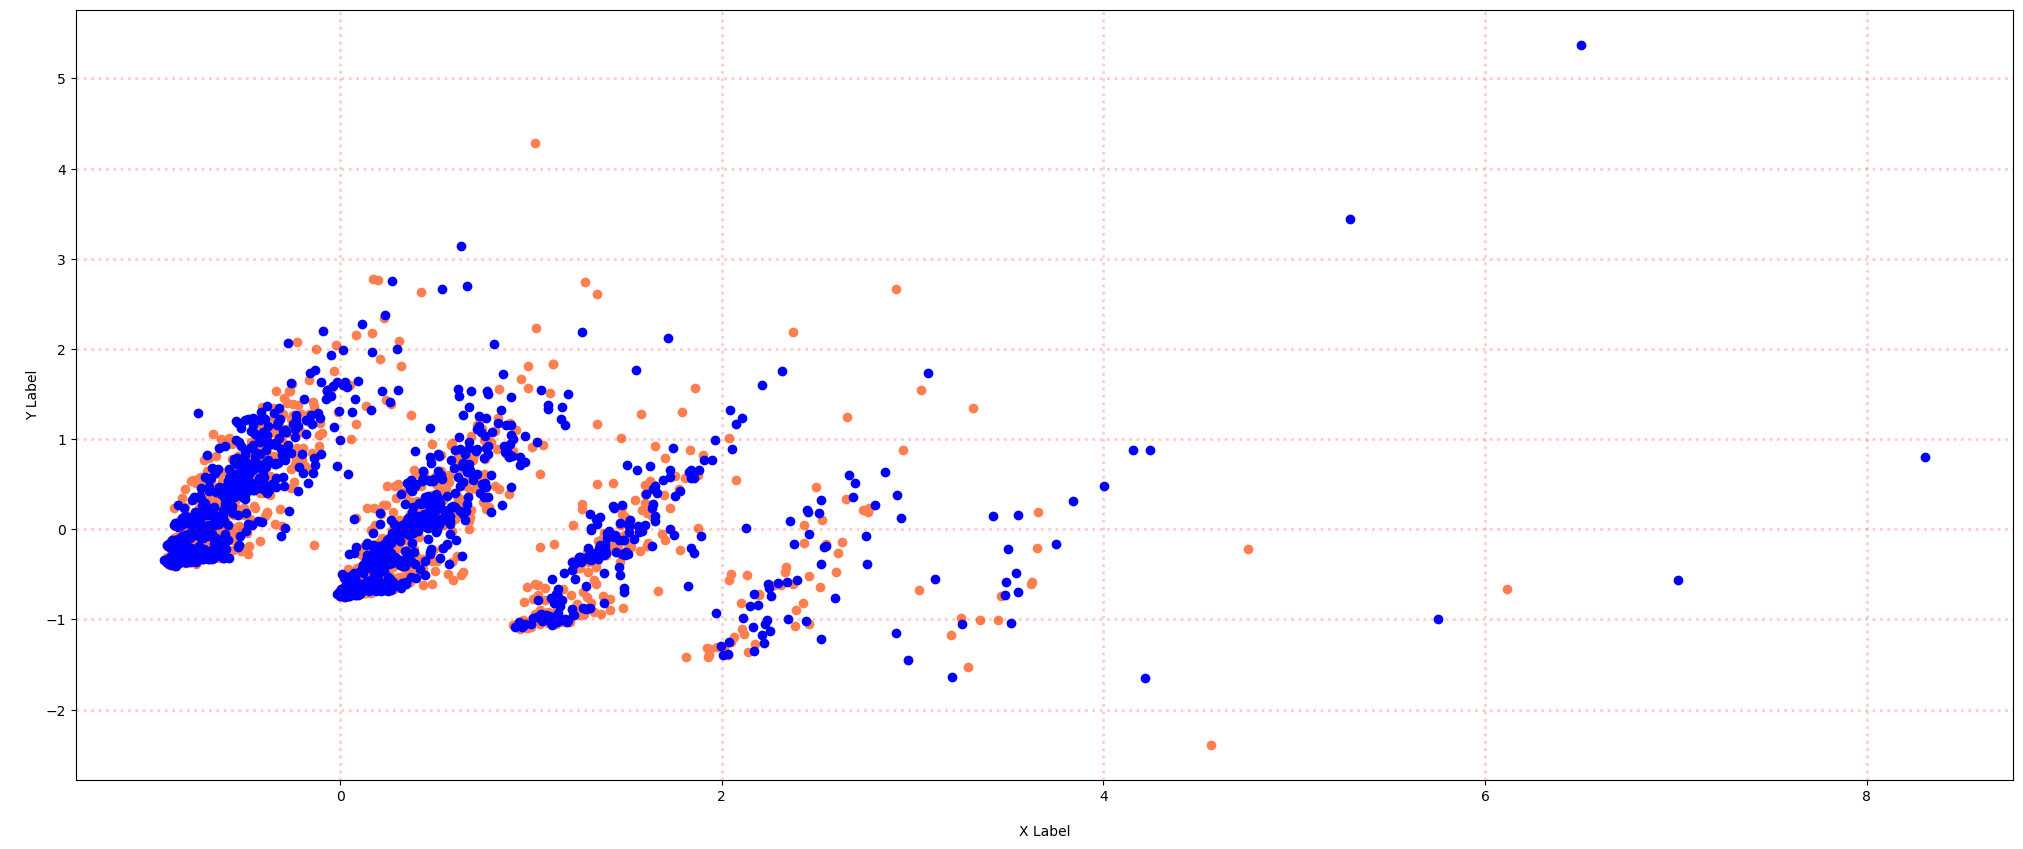

In [141]:
col = ['coral', 'blue', 'black', 'orange']

fig = plt.figure(figsize = (25,10))
ax = fig.subplots()
for c, category in zip(col, categories):
    xs = X_reduced[all_data['label'] == category].T[0]
    ys = X_reduced[all_data['label'] == category].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='red', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
plt.show()

# Exercise 12

In [142]:
from sklearn.decomposition import PCA
print(X_counts.shape)
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2983, 5155)
(2983, 3)


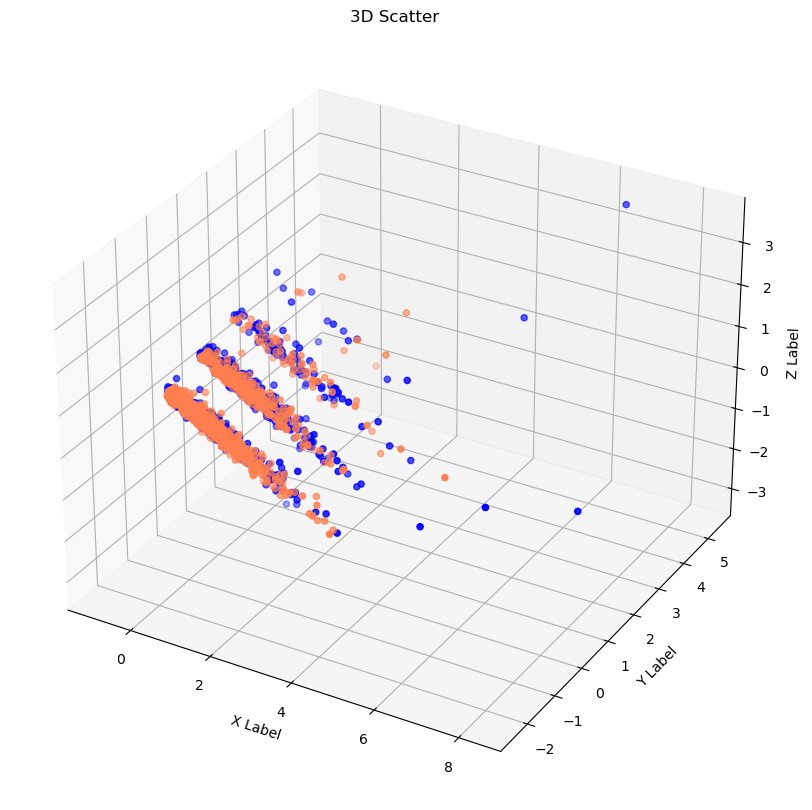

In [143]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue','black','orange']

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced[all_data['label'] == category].T[0]
    ys = X_reduced[all_data['label'] == category].T[1]
    zs = X_reduced[all_data['label'] == category].T[2]
    
    ax.view_init(30)  
    ax.scatter(xs, ys, zs, c=c)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title(f'3D Scatter')

plt.show()

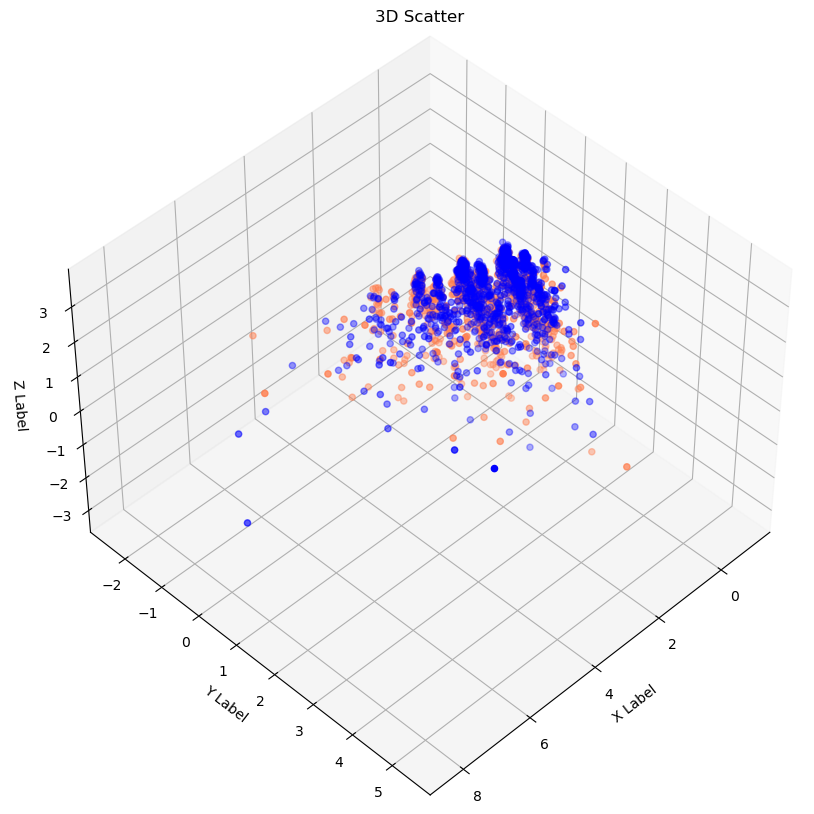

In [144]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue','black','orange']

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced[all_data['label'] == category].T[0]
    ys = X_reduced[all_data['label'] == category].T[1]
    zs = X_reduced[all_data['label'] == category].T[2]
    
    ax.view_init(45,45)  
    ax.scatter(xs, ys, zs, c=c)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title(f'3D Scatter')

plt.show()

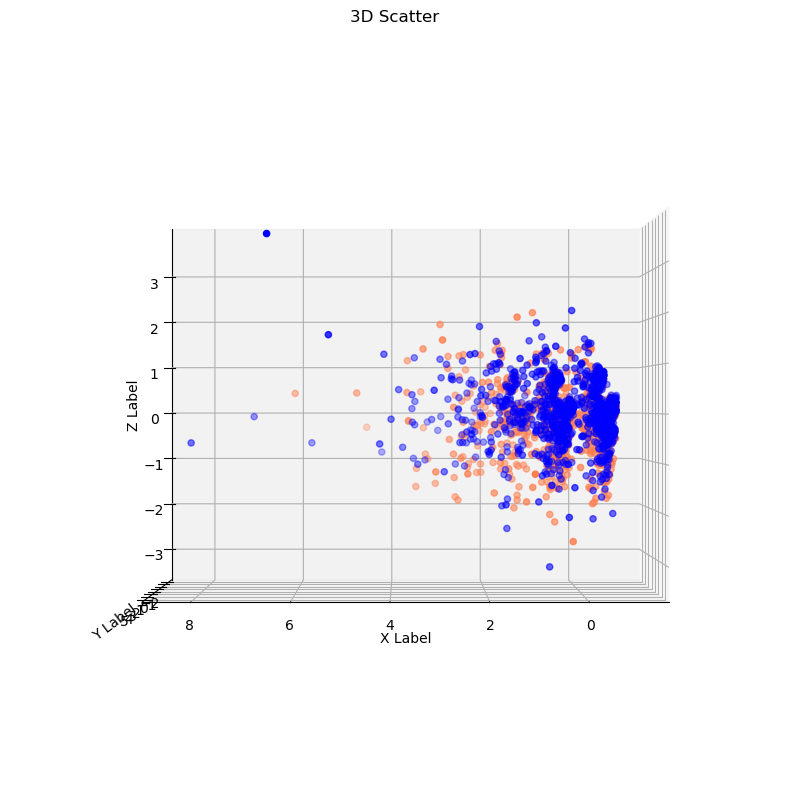

In [146]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue','black','orange']

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced[all_data['label'] == category].T[0]
    ys = X_reduced[all_data['label'] == category].T[1]
    zs = X_reduced[all_data['label'] == category].T[2]
    
    ax.view_init(0,90)  
    ax.scatter(xs, ys, zs, c=c)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title(f'3D Scatter')

plt.show()

In [147]:
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(X_counts[:,j].toarray().sum())
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

5155


# Exercise 13

In [148]:
!pip install chart-studio

In [149]:
import pandas as pd
import plotly.graph_objs as go

In [150]:
import pandas as pd
import plotly.graph_objs as go
# 建立ㄌX&Y軸
x = count_vect.get_feature_names_out()[:300]
y = term_frequencies[:300]
trace = go.Bar(x=x,y=y,name="Term Frequency")
# 建立標籤
layout = go.Layout(title="Frequency Analyze",xaxis={"title":"term"},
    yaxis={"title":"times"},barmode="group")
fig = go.Figure(data = [trace],layout=layout)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

## Exercise 14

In [151]:
x = np.asarray(count_vect.get_feature_names_out()[:300]).reshape((300,1))
y = term_frequencies[:300].reshape((300,1))
sum =  np.hstack((x, y))
feature_names=[]
frequencies=[]
for j in range(0,sum.shape[0]):
    if sum[j,1]>1:
        feature_names.append(sum[j,0])
        frequencies.append(sum[j,1])

x = feature_names
y = frequencies
trace = go.Bar(x=x,y=y,name="times")
layout = go.Layout(title="term frequency larger than 1",xaxis={"title":"term"},
    yaxis={"title":"times"},barmode="group")

fig = go.Figure(data = [trace],layout=layout)
fig.show()

# Exercise 15

In [152]:
x = np.asarray(count_vect.get_feature_names_out()[:300]).reshape((300,1))
y = term_frequencies[:300].reshape((300,1))
sum =  np.hstack((x, y))

sum_sorted = np.array(sorted(sum, key=lambda row: row[1], reverse=True)) ## sort
feature_names=[]
frequencies=[]
for j in range(0,sum_sorted.shape[0]):
    if sum[j,1]>1:
        feature_names.append(sum_sorted[j,0])
        frequencies.append(sum_sorted[j,1])

x = feature_names
y = frequencies
trace = go.Bar(x=x,y=y,name="times")
layout = go.Layout(title="term frequency larger than 1",xaxis={"title":"term"},
    yaxis={"title":"times"},barmode="group")

fig = go.Figure(data = [trace],layout=layout)
fig.show()

In [153]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
print(all_data.label)

0       0
1       1
2       1
3       0
4       1
       ..
2978    0
2979    0
2980    0
2981    0
2982    0
Name: label, Length: 2983, dtype: int64


In [154]:
mlb.fit(all_data.label)

LabelBinarizer()

In [155]:
all_data

,text,label,category,prov,unigrams
0,So there is no way for me to plug it in here i...,0,negative,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negative,amazon,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,positive,amazon,"[The, mic, is, great, .]"
...,...,...,...,...,...
2978,I think food should have flavor and texture an...,0,negative,yelp,"[I, think, food, should, have, flavor, and, te..."
2979,Appetite instantly gone.,0,negative,yelp,"[Appetite, instantly, gone, .]"
2980,Overall I was not impressed and would not go b...,0,negative,yelp,"[Overall, I, was, not, impressed, and, would, ..."
2981,"The whole experience was underwhelming, and I ...",0,negative,yelp,"[The, whole, experience, was, underwhelming, ,..."


# Exercise 16

In [156]:
print(all_data.prov)
mlb.fit(all_data.prov)

0       amazon
1       amazon
2       amazon
3       amazon
4       amazon
         ...  
2978      yelp
2979      yelp
2980      yelp
2981      yelp
2982      yelp
Name: prov, Length: 2983, dtype: object


LabelBinarizer()

In [157]:
all_data['bin_prov'] = mlb.transform(all_data['prov']).tolist()
print(all_data[0:10])
print(all_data[1995:2005])

                                                text  label  category    prov  \
0  So there is no way for me to plug it in here i...      0  negative  amazon   
1                        Good case, Excellent value.      1  positive  amazon   
2                             Great for the jawbone.      1  positive  amazon   
3  Tied to charger for conversations lasting more...      0  negative  amazon   
4                                  The mic is great.      1  positive  amazon   
5  I have to jiggle the plug to get it to line up...      0  negative  amazon   
6  If you have several dozen or several hundred c...      0  negative  amazon   
7        If you are Razr owner...you must have this!      1  positive  amazon   
8                Needless to say, I wasted my money.      0  negative  amazon   
9                   What a waste of money and time!.      0  negative  amazon   

                                            unigrams   bin_prov  
0  [So, there, is, no, way, for, me, to, p

## Third Part

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


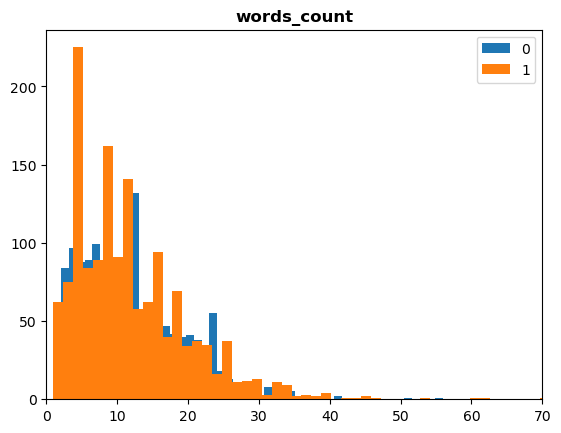

In [158]:
## 3-1 根據三篇data正負評論的字數去觀察字數與正負評的關係
import matplotlib.pyplot as plt

all_data['words_count']= all_data['text'].apply(lambda x:len(x.split()))

plt.hist(all_data[all_data['label']==0]["words_count"],bins=50,label="0")
plt.hist(all_data[all_data['label']==1]["words_count"],bins=50,label="1")
plt.xlim([0,70])
plt.legend()
plt.title("words_count",fontweight = "bold")
plt.show()

In [159]:
## 3-2 Generate **TF-IDF features** from the tokens of each text. 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
all_data_tfidf = tfidf_vect.fit_transform(all_data.text)
print('all_data:', all_data_tfidf.shape)
print(all_data_tfidf[0])

all_data: (2983, 5155)
  (0, 1013)	0.39845543988934873
  (0, 647)	0.2233655373587691
  (0, 1982)	0.2314910330235545
  (0, 4793)	0.3319671168188344
  (0, 4835)	0.2754374241479848
  (0, 4531)	0.08660987696634037
  (0, 2158)	0.22274667474668547
  (0, 2314)	0.29538734318239734
  (0, 2432)	0.11967447562998453
  (0, 3387)	0.30868158568324194
  (0, 4609)	0.12743956571028017
  (0, 2809)	0.2286268276414034
  (0, 1829)	0.15641232030594823
  (0, 4987)	0.24912754996231995
  (0, 3043)	0.2233655373587691
  (0, 2427)	0.12068879835601415
  (0, 4545)	0.20758518394408282
  (0, 4161)	0.1873972955866557


In [160]:
all_data_counts = count_vect.fit_transform(all_data.text)
frequency_result = pd.DataFrame(all_data_counts.toarray(), columns = count_vect.get_feature_names())
TF_IDF_result = pd.DataFrame(all_data_tfidf.toarray(), columns = tfidf_vect.get_feature_names())
frequency_result['label']= all_data['label']
TF_IDF_result['label']= all_data['label']

/Users/howard891005/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/Users/howard891005/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [161]:
## 3-3 Implement a simple Naive Bayes classifier that automatically classifies the records into their categories
## Bernoulli naive Bayes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import BernoulliNB

# 切分 word frequency 的 train、test資料
train_data, test_data = train_test_split(frequency_result, test_size=0.2, random_state=42)
print('train:', train_data.shape)
print('test:', test_data.shape)
# 切分  tf-idf 的 train、test資料
train_f_data, test_f_data = train_test_split(TF_IDF_result, test_size=0.2, random_state=42)
print('train:', train_f_data.shape)
print('test:', test_f_data.shape)

# word_frequency
clf = BernoulliNB()
clf.fit(train_data.drop(["label"],axis=1), train_data['label'])
y_pred_count = clf.predict(test_data.drop(["label"],axis=1))
print('-----Count-----')
print(classification_report(test_data["label"], y_pred_count))
print(accuracy_score(test_data["label"], y_pred_count))

# tfidf
clf = BernoulliNB()
clf.fit(train_f_data.drop(["label"],axis=1), train_f_data['label'])
y_pred_tfidf = clf.predict(test_f_data.drop(["label"],axis=1))
print('-----Tfidf-----')
print(classification_report(test_f_data["label"], y_pred_tfidf))
print(accuracy_score(test_f_data["label"], y_pred_tfidf))


train: (2386, 5156)
test: (597, 5156)
train: (2386, 5156)
test: (597, 5156)
-----Count-----
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       307
           1       0.82      0.82      0.82       290

    accuracy                           0.82       597
   macro avg       0.82      0.82      0.82       597
weighted avg       0.82      0.82      0.82       597

0.8241206030150754
-----Tfidf-----
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       307
           1       0.82      0.82      0.82       290

    accuracy                           0.82       597
   macro avg       0.82      0.82      0.82       597
weighted avg       0.82      0.82      0.82       597

0.8241206030150754


# Fourth Part

4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__

1. 首先，在part2中關於資料的讀取，因為這三筆資料的形式都比較整齊所以才能比較快的做出整理，若有較混亂的資料，可能需要更有效率整理與輸入資料的方法，還有在合併資料時，如果在前面沒有先將每一個評論的來源作標記（三個data來源），在做Exercise 16時就會沒有catagory的分類可以去做LabelBinarizer，而當我回去剛開始的地方更改時，又會影響前面所有關於data frame的output，故可能要先把所有需要的資料分類都先設定好，以免後續的分析會沒有足夠的資料做分析。

2. 在Sampling的部分，由於取樣是隨機的，所以在這幾筆資料中並沒有什麼特別的關係性，可能需要加一些條件進去才會讓這個Sample比較具有意義。

3. 在feature subset selection的環節中，資料會被分為每個document與所有字彙的龐大matrix，當資料量或詞彙量數據龐大時，會形成佔用很多空間資源的sparse matrix，在尋找每個document或者part2中的單一則評論的詞彙時就會比較麻煩。因此在處理此類data時，可以利用字會出現頻率的計算去對data作出預排列。
